In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

In [49]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [50]:
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['font.size'] = 50
mpl.rcParams['figure.figsize'] =  15,10
mpl.rcParams['axes.labelsize'] = 50
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

In [4]:
import numpy as np

In [5]:
data = []

In [6]:
with open('Data-GT/leaf/all_results_w_labels') as fs:
    for line in fs:
        temp = line.strip().split('\t')
        data.append(temp[2:])

In [10]:
data = np.array(data,dtype=np.float)

In [15]:
#data = np.loadtxt('Data-GT/Whitewine/results_to_plot',delimiter='	')
data = np.loadtxt('Data-GT/MNIST/all_results_use',delimiter='  ')

In [11]:
data.shape

(12, 7)

In [21]:
data[:,5]

array([-0.195   ,  0.139   ,  0.121   ,  0.115   , -0.25    , -0.26    ,
        0.137   ,  0.124   ,  0.139   , -0.337   , -0.009375, -0.012   ])

In [15]:
labels = []
with open('Data-GT/leaf/all_labels') as fs:
    for line in fs:
        labels.append(line.strip())

In [9]:
labels

['l1AP',
 'l1AV',
 'l1CO',
 'l1KM',
 'l1SI',
 'l2AP',
 'l2AV',
 'l2CO',
 'l2KM',
 'l2SI',
 'SP',
 'BI']

In [25]:
data[:,6]

array([1.27 , 1.42 , 1.832, 1.9  , 1.103, 0.949, 1.364, 1.688, 1.78 ,
       0.966, 6.83 , 2.65 ])

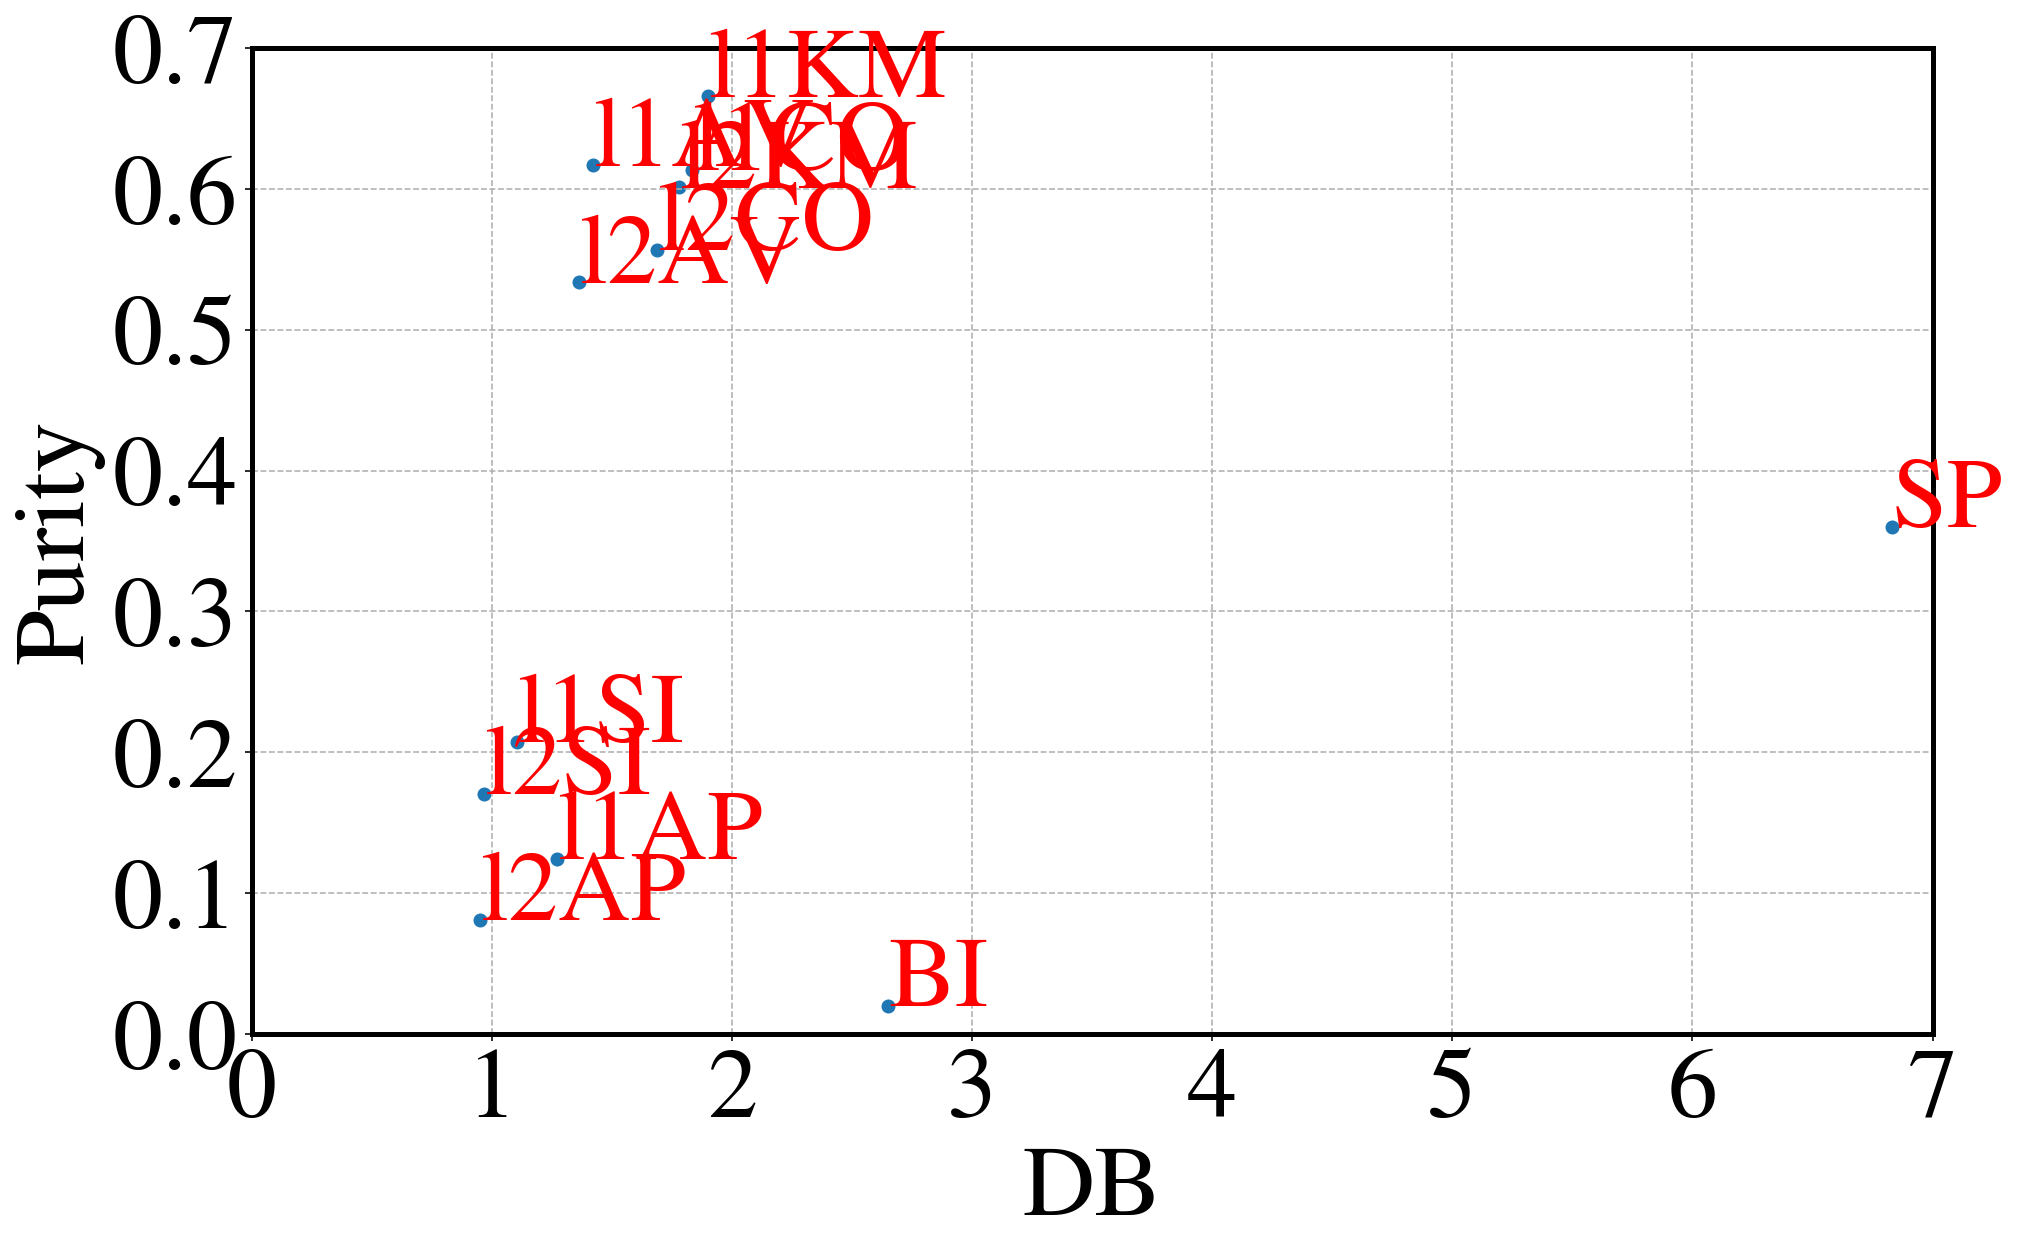

In [27]:
fig, ax = plt.subplots()
plt.grid(linestyle='--')

plt.ylim(0,0.7)
y_pos = np.arange(0,0.8,step = 0.1)
ax.set_yticks(y_pos)
plt.xlim(0,7)
x_pos = np.arange(0,8,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('Purity')
plt.xlabel('DB')

ax.scatter(data[:,6],data[:,2])

for i, txt in enumerate(labels):
    ax.annotate(txt, (data[i,6], data[i,2]), color='r', fontsize=50)

plt.tight_layout()
plt.savefig('plots/leaf_DB_purity.pdf',dpi=200)    

In [189]:
from matplotlib.lines import Line2D

In [196]:
custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2)]

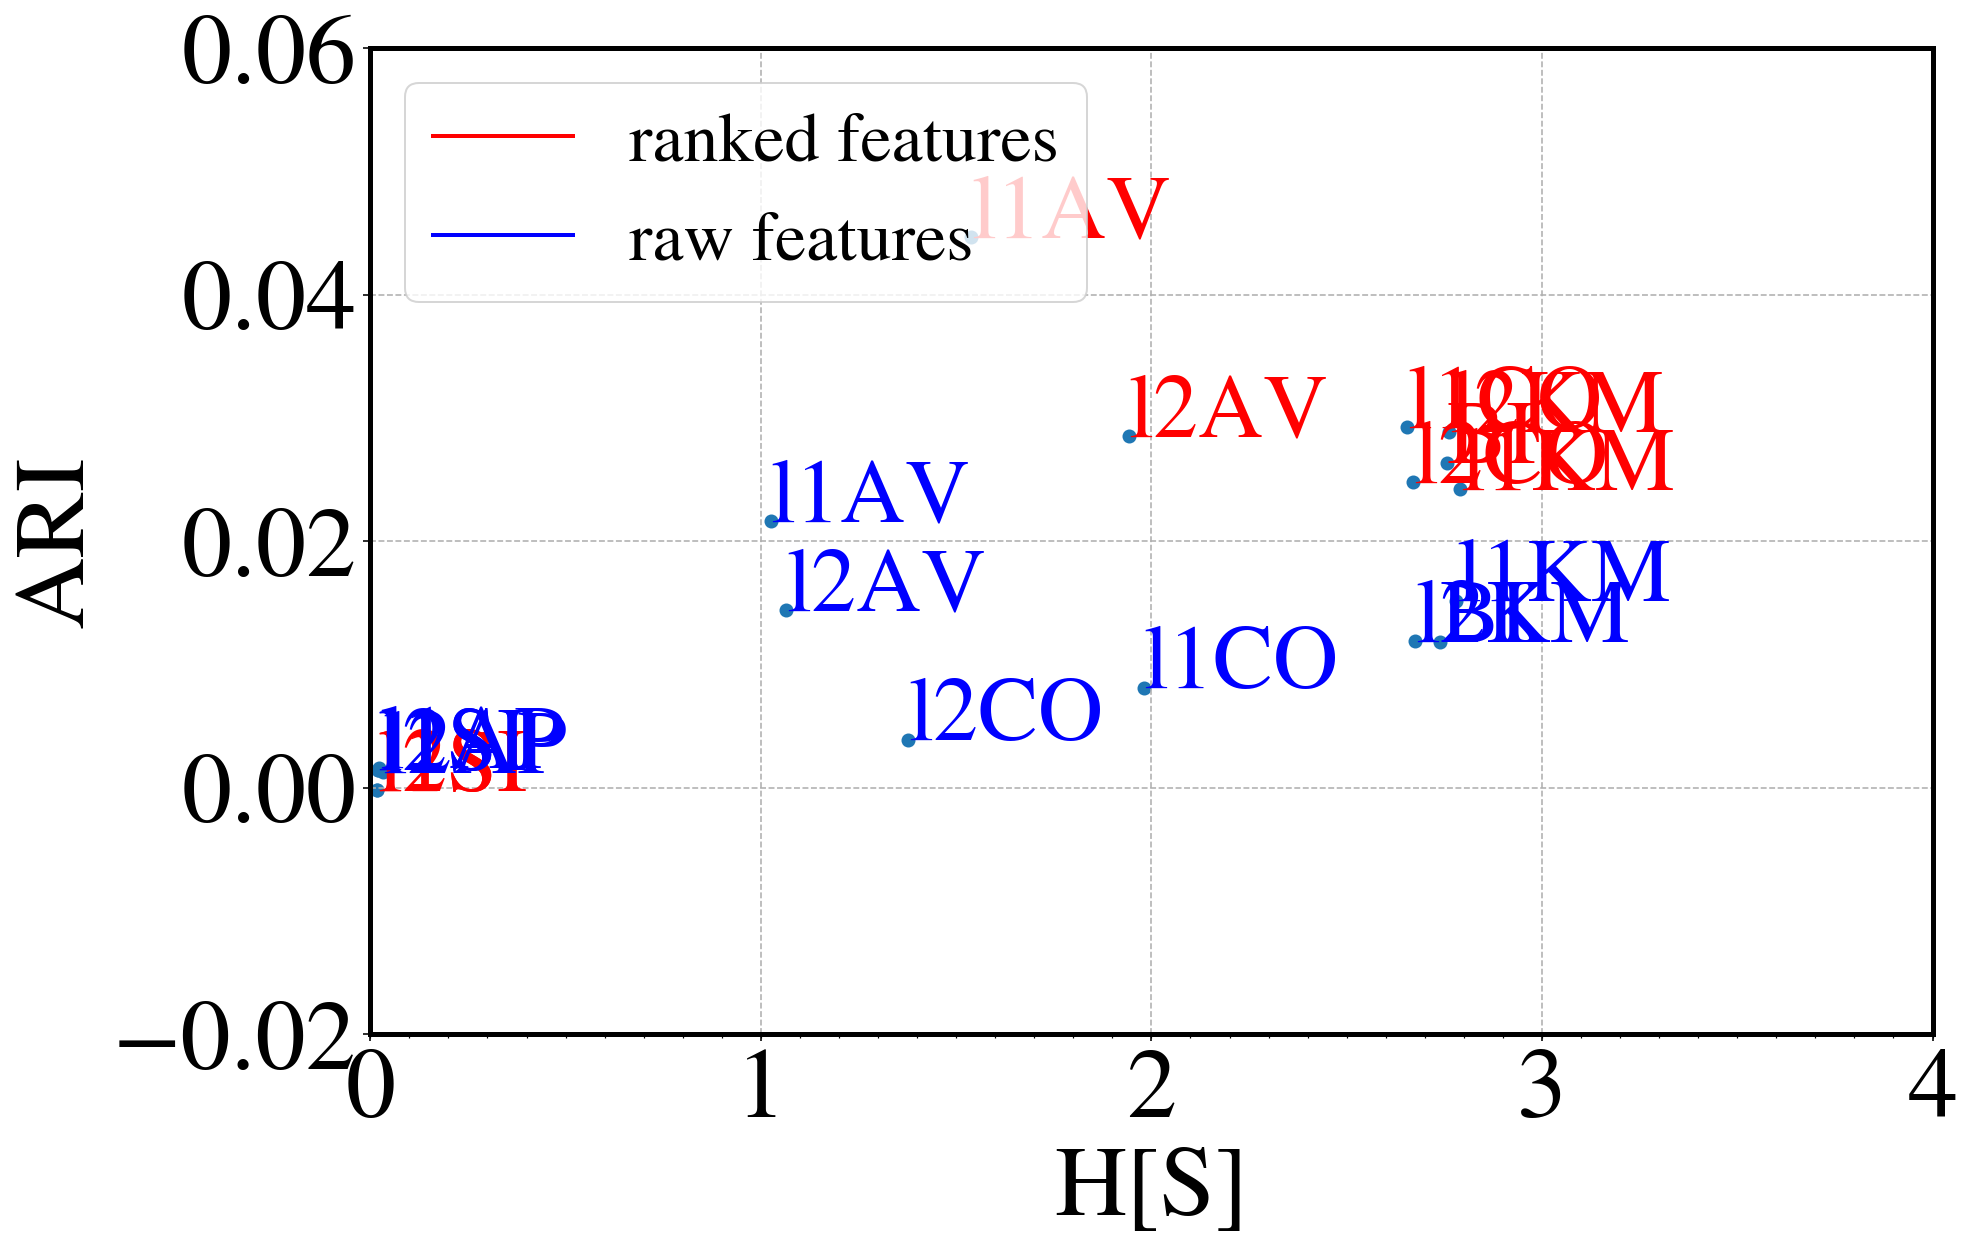

In [242]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.02,0.06)
y_pos = np.arange(-0.02,0.08,step = 0.02)
ax.set_yticks(y_pos)
plt.xlim(0,4)
x_pos = np.arange(0,5,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['ranked features', 'raw features'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4])

for i, txt in enumerate(labels):
    if 'rw' in txt:
        ax.annotate(txt.replace('rw',''), (data[i,0], data[i,4]), color='b', fontsize=45)
    else:
        ax.annotate(txt.replace('ra',''), (data[i,0], data[i,4]), color='r', fontsize=45)

plt.tight_layout()
plt.savefig('plots/whitewine_ARI.pdf',dpi=200)    

In [22]:
H_sig = [0.34, 0.52, 0.47, 0.16, 0.15, 0.62, 0.28, 0.45, 0.47, 0.42, 0.56, 0.30, 0.33, 0.41, 0.18]
H_s = [0.65, 0.62, 0.89, 0.56, 0.53, 0.76, 0.52, 0.70, 0.82, 0.79, 0.91, 0.75, 0.85, 0.78, 0.82]

In [23]:
len(H_sig)

15

In [24]:
len(H_s)

15

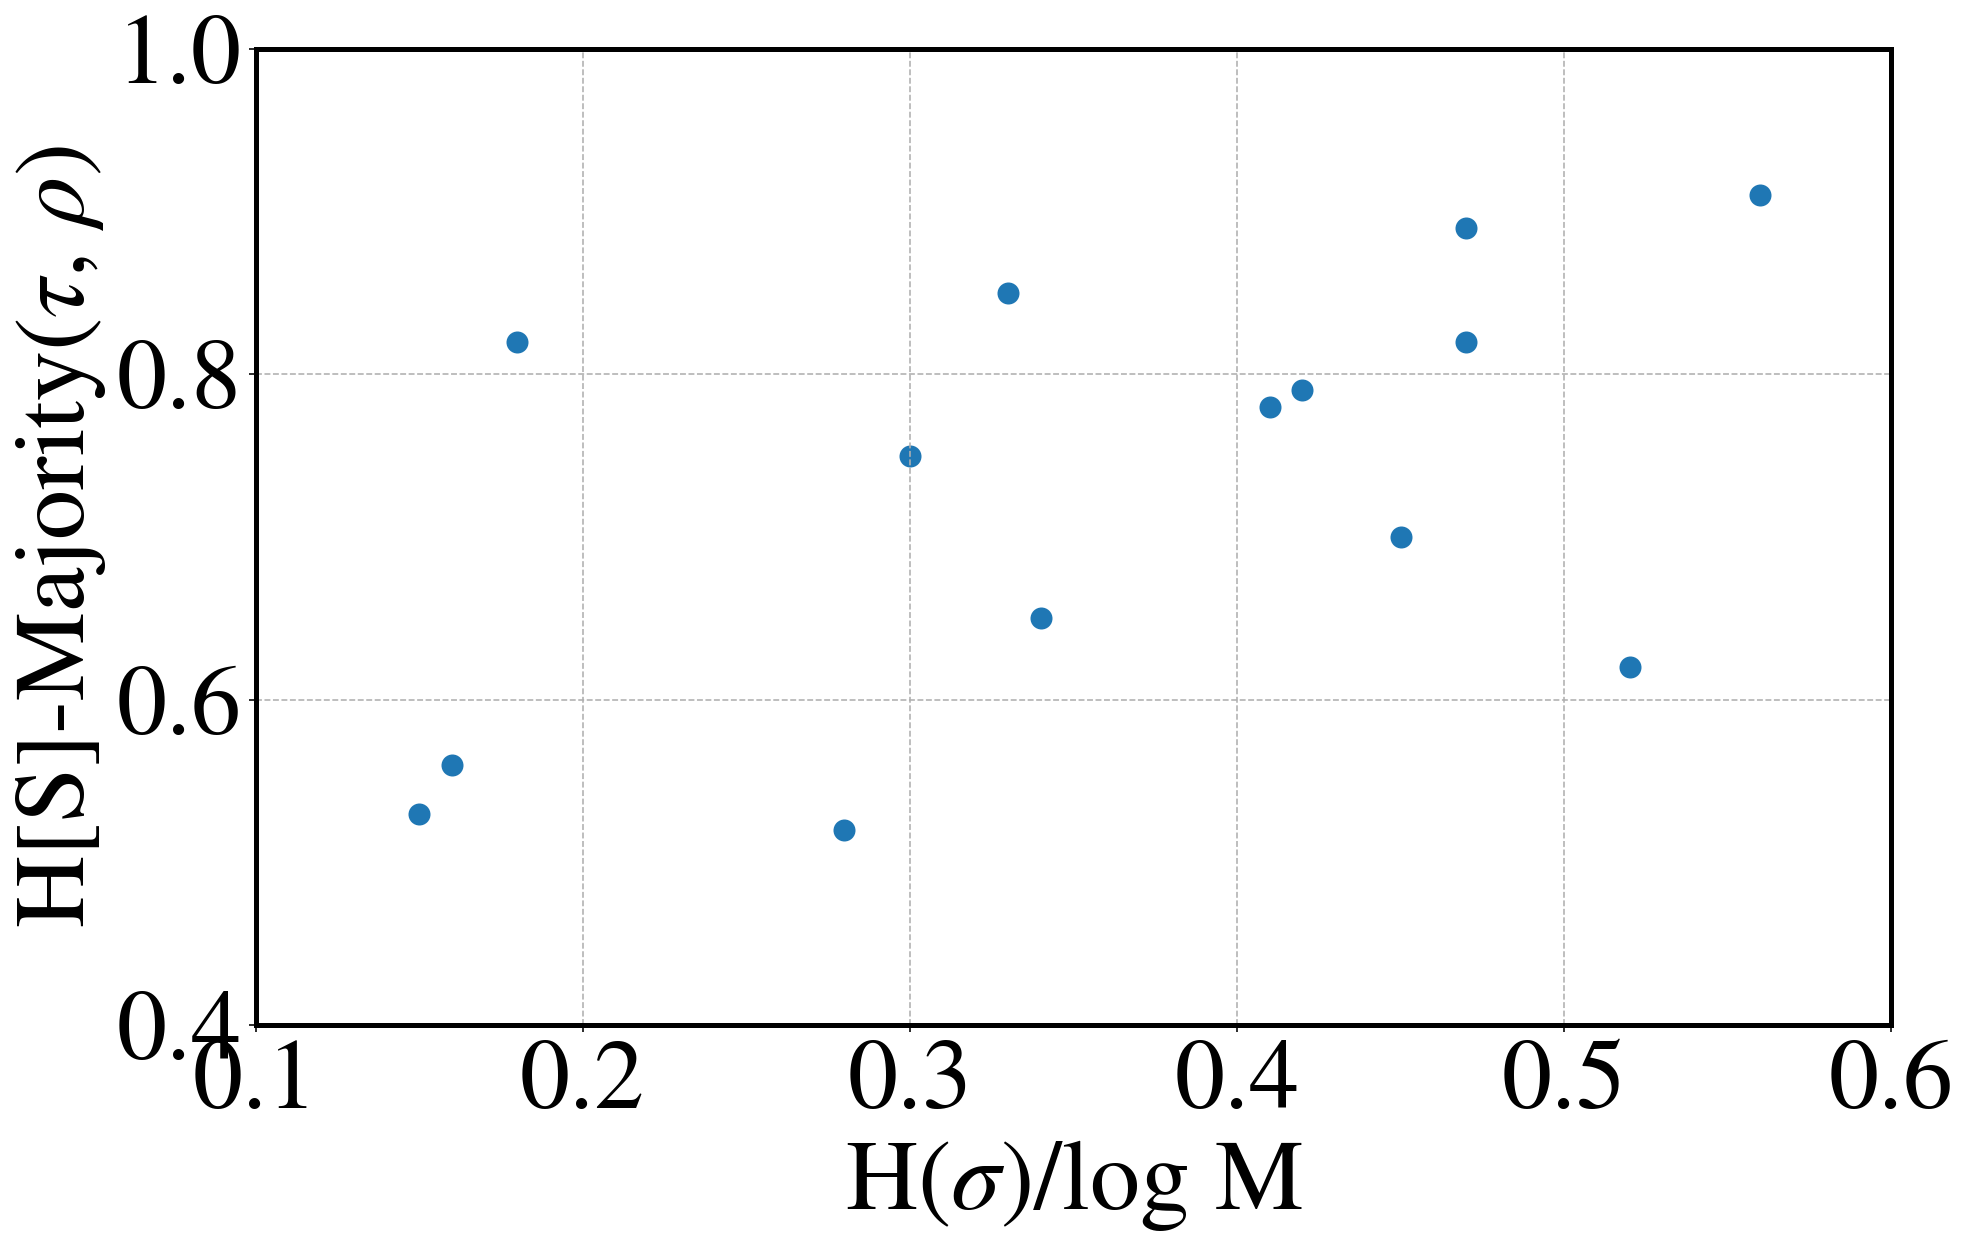

In [36]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.xlim(0.1,0.6)
x_pos = np.arange(0.1,0.7,step = 0.1)
#print(x_pos)
ax.set_xticks(x_pos)

plt.ylim(0.4,1.0)
y_pos = np.arange(0.4,1.2,step = 0.2)
ax.set_yticks(y_pos)

plt.xlabel(r'H($\sigma$)/log M')
plt.ylabel(r'H[S]-Majority($\tau$, $\rho$)')

ax.scatter(H_sig,H_s,s=100)

plt.tight_layout()
plt.savefig('plots/summary.pdf',dpi=200)

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import r2_score

In [3]:
H_sig = [0.34, 0.52, 0.47, 0.16, 0.15, 0.62, 0.28, 0.45, 0.47, 0.42, 0.56, 0.30, 0.33, 0.41, 0.18]
H_s = [0.65, 0.62, 0.89, 0.56, 0.53, 0.76, 0.52, 0.70, 0.82, 0.79, 0.91, 0.75, 0.85, 0.78, 0.82]

In [4]:
H_sig = np.array(H_sig)

In [6]:
H_sig = H_sig.reshape(-1,1) 

In [7]:
H_sig

array([[0.34],
       [0.52],
       [0.47],
       [0.16],
       [0.15],
       [0.62],
       [0.28],
       [0.45],
       [0.47],
       [0.42],
       [0.56],
       [0.3 ],
       [0.33],
       [0.41],
       [0.18]])

In [9]:
H_sig[:12]

array([[0.34],
       [0.52],
       [0.47],
       [0.16],
       [0.15],
       [0.62],
       [0.28],
       [0.45],
       [0.47],
       [0.42],
       [0.56],
       [0.3 ]])

In [8]:
H_s = np.array(H_s)

In [33]:
reg = LinearRegression().fit(H_sig, H_s)

In [35]:
reg.score(H_sig, H_s)

0.2528482599346086

In [19]:
pred = reg.predict(H_sig[10:])

In [20]:
H_s[10:]

array([0.91, 0.75, 0.85, 0.78, 0.82])

In [21]:
pred

array([0.78605204, 0.63178733, 0.6495871 , 0.69705317, 0.56058824])

In [22]:
r2_score(H_s[10:],pred)

-8.281479493595647

In [24]:
import random

In [23]:
Data = [(0.34,0.85,0.65),(0.52,0.98,0.62),(0.47,0.89,0.89),(0.16,0.66,0.56),(0.15,0.65,0.53),(0.62,1.0,0.76),
       (0.28,0.82,0.52),(0.45,0.74,0.70),(0.47,0.70,0.82),(0.42,0.82,0.79),(0.56,0.81,0.91),(0.30,0.61,0.75),
       (0.33,0.66,0.85),(0.41,0.76,0.78),(0.18,0.90,0.82)]

In [25]:
random.shuffle(Data)

In [39]:
def traintestSplit(Data, both=True):
    random.shuffle(Data)
    train, test = Data[:10], Data[10:]
    train_x = np.array([[r[0],r[1]] if both else [r[0]] for r in train])
    train_y = np.array([r[2] for r in train])
    test_x = np.array([[r[0],r[1]] if both else [r[0]] for r in test])
    test_y = np.array([r[2] for r in test])
    return train_x,train_y,test_x,test_y

In [44]:
scores = []
for _ in range(20):
    train_x,train_y,test_x,test_y = traintestSplit(Data, both=True)
    reg = LinearRegression().fit(train_x, train_y)
    scores.append(reg.score(train_x,train_y))
print(sum(scores)/len(scores))    

0.40491592892601486


In [41]:
scores

[0.23368790910847204,
 0.25610895896953223,
 0.2954224114565499,
 0.293793827077364,
 0.10630834884547458,
 0.5582816752190667,
 0.04832847053438848,
 0.5588309364412559,
 0.0196357314070158,
 0.33681664794219346]

In [45]:
scores

[0.164917283287618,
 0.21443392003026107,
 0.6849384316005906,
 0.49850082492589287,
 0.6944339756831079,
 0.5627526002405765,
 0.20324882039914638,
 0.10434033645320984,
 0.7039697382478093,
 0.1197860421241318,
 0.4758356709880527,
 0.1506649626533969,
 0.19179376818106952,
 0.6299570954568643,
 0.36956343148901694,
 0.19780787521843723,
 0.5996663448126205,
 0.06238172646635775,
 0.7547534189792374,
 0.7145723112829004]

In [53]:
from mpl_toolkits.mplot3d import Axes3D

In [54]:
x_0 = np.array([r[0] for r in Data])
x_1 = np.array([r[1] for r in Data])
y = np.array([r[2] for r in Data])

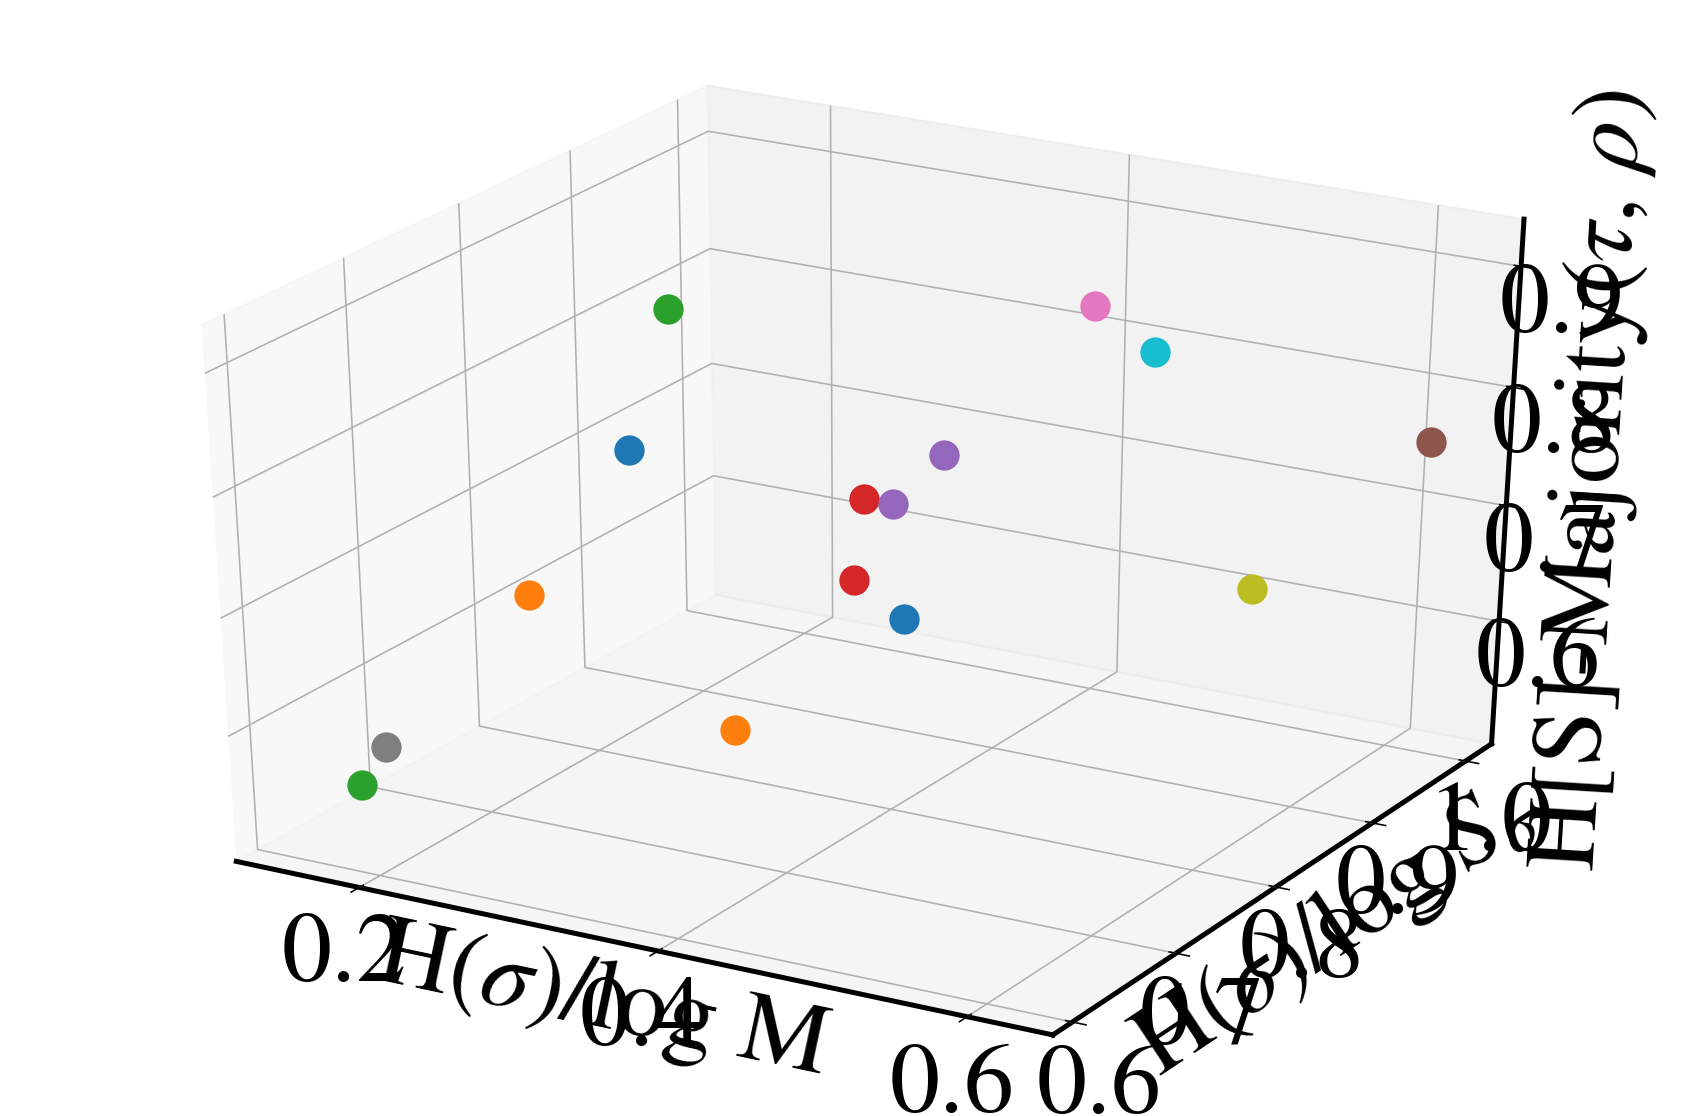

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for a,b,c in zip(x_0,x_1,y):
    ax.scatter(a, b, c, s=200)

ax.set_xlabel(r'H($\sigma$)/log M')
ax.set_ylabel(r'H($\sigma$)/log $S_{\sigma}$')
ax.set_zlabel(r'H[S]-Majority($\tau$, $\rho$)')
ax.xaxis.set_label_coords(5, 5)
plt.show()